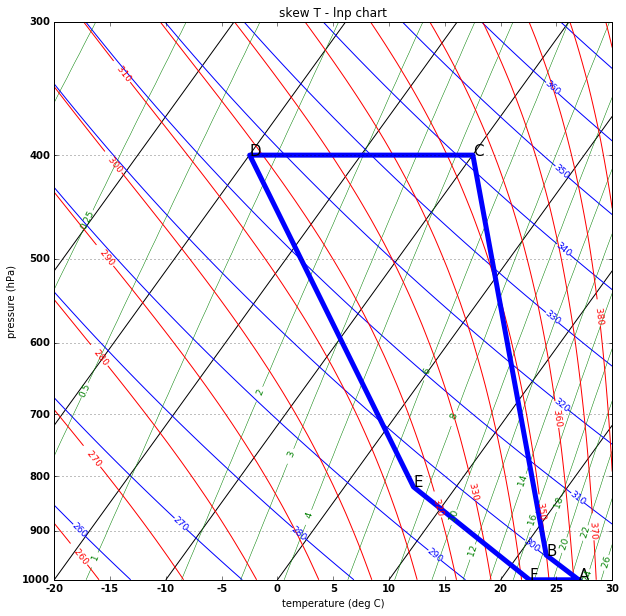

In [37]:
import site
import matplotlib.pyplot as plt
import numpy as np
from a405thermo.constants import constants as c
from a405thermo.thermlib import *
from a405skewT.makeSkewII import makeSkewWet

# dry adiabatic rising A > B
# Moist adiabatic ascent B > C
# Isobaric cooling C > D
# Moist adiabatic descent D >E
# dry adiabatic rising E > F
# Isobaric warming from F to A

press_A = 1.e5
temp_A = 300 #K 
RH_A = 0.8

# for point A, find rsat > find Rv > find Td > find LCL
# dry adiabatic rising A > B
rsat_A = find_rsat(tempA,pressA)
Rv_A = RH_A * rsat_A
Td_A = find_Td(Rv_A, press_A)

temp_B, press_B = find_lcl (Td_A, temp_A, press_A)
Td_B = find_Td(Rv_A, press_B)

# Moist adiabatic ascent B > C
# for point B, find entropy and follow until press_C = 0.4e5

thetaet_B = find_thetaet(temp_B, Rv_A, temp_B,press_B)
press_C = 0.4e5
temp_C, Rv_C_moist, rl_C_moist = tinvert_thetae(thetaes_B, Rv_A, press_C)

# loss 80% of liquid water

rt_C = 0.2*rl_C_moist + Rv_C_moist

# Isobaric cooling C > D
# cooling 20K, constant pressure - find temp_D, Td_D, thetaet_D

temp_D = temp_C -20
Td_D = find_Td(rt_C, press_C)
thetaet_D = find_thetaet(Td_D, rt_C, temp_D, press_C)

# Moist adiabatic descent D > E
# dry adiabatic descent E > F
# work from F to get press_E like A > B
press_F = press_A
Td_F = find_Td(rt_C, press_F)
temp_F, Rv_F, rl_F = tinvert_thetae(thetaet_D, rt_C, press_F)

temp_E, press_E = find_lcl (Td_F, temp_F, press_F)

%matplotlib inline

# plotting each point on skew T - ln P plot as a blue diamond 
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax, skew = makeSkewWet(ax, corners=[-20,30])
ax.set(ylim=[1000, 300])

press_D = press_C

xskewA = convertTempToSkew(temp_A-273., press_A*0.01, skew)
xskewB = convertTempToSkew(temp_B-273., press_B*0.01, skew)
xskewC = convertTempToSkew(temp_C-273., press_C*0.01, skew)
xskewD = convertTempToSkew(temp_D-273., press_D*0.01, skew)
xskewE = convertTempToSkew(temp_E-273., press_E*0.01, skew)
xskewF = convertTempToSkew(temp_F-273., press_F*0.01, skew)

ax.text(xskewA,press_A*0.01,'A', fontsize= 15)

ax.text(xskewB,press_B*0.01,'B', fontsize= 15)

ax.text(xskewC,press_C*0.01,'C', fontsize= 15)

ax.text(xskewD,press_D*0.01,'D', fontsize= 15)

ax.text(xskewE,press_E*0.01,'E', fontsize= 15)

ax.text(xskewF,press_F*0.01,'F', fontsize= 15)

x,y = zip((xskewA,press_A*0.01), (xskewB,press_B*0.01), (xskewC,press_C*0.01), (xskewD,press_D*0.01)\
          ,(xskewE,press_E*0.01),(xskewF,press_F*0.01),(xskewA,press_A*0.01)) 
ax.plot(x,y,c='b',lw='5')

1. Use makeSkewWet to draw this cycle on a tephigram, using carnot.py and the midterm solution notebook as guidance.
2. Calculate the change in enthalpy at the surface and at 400 hPa, including both sensible and latent heat terms.
3. Find the total work done by the engine, and its efficiency.
4. Find the percentage of the total heat change that is due to addition and remove of water during the cycle.

In [47]:
#  2. Calculate the change in enthalpy at the surface and at 400 hPa, 
#  including both sensible and latent heat terms. (from tim)

dh_bot = (((c.cpd + Rv_A*c.cl)*temp_A + Rv_A*find_lv(temp_A)) - 
          ((c.cpd + (Rv_F+rl_F)*c.cl)*temp_F + Rv_F*find_lv(temp_F)))
print('2.')
print("Change in enthalpy at surface = {} J/kg".format(dh_bot))

rsat_C = find_rsat(temp_C, press_C)
Rv_D,rl_D = find_rvrl(temp_D, rsat_C, press_D)
Rv_C,rl_C = find_rvrl(temp_C, rsat_C, press_C)

dh_top = (((c.cpd + Rv_D*c.cl)*temp_D + Rv_D*find_lv(temp_D)) - 
          ((c.cpd + (Rv_C+rl_C)*c.cl)*temp_C + Rv_C*find_lv(temp_C)))
print("Change in enthalpy at 400 hPa = {} J/kg".format(dh_top))

# 3. Find the total work done by the engine, and its efficiency.
# dq = dh for constant pressure (from tim)

work = abs(dh_bot) - abs(dh_top)
eff = (abs(dh_bot) - abs(dh_top))/abs(dh_bot)

print('3.')
print("Work done = {} J/kg, efficiency = {}".format(work, eff))

# 4. Find the percentage of the total heat change that is due to addition and 
#    remove of water during the cycle. (from tim)

dh_bot_temp = c.cpd*(temp_A - temp_E)
water_effects_bot = 1 - dh_bot_temp/dh_bot

dh_top_temp = c.cpd*(temp_D - temp_C)
water_effects_top = 1 - dh_top_temp/dh_top

print('4.')
print("Heat change due to water at surface = {:.2f}%".format(water_effects_bot*100))
print("Heat change due to water at 400 hPa = {:.2f}%".format(water_effects_top*100))

2.
Change in enthalpy at surface = 46769.87053341401 J/kg
Change in enthalpy at 400 hPa = -33326.216099876474 J/kg
3.
Work done = 13443.654433537537 J/kg, efficiency = 0.2874426266357296
4.
Heat change due to water at surface = 55.23%
Heat change due to water at 400 hPa = 39.65%
